# Sign Language
A lot of people are not very familiar with Sign Language, resulting in a form of marginalisation for the deaf community. With the use of CNNs, we can create a model that can read sign language and translate them to English letters for those not well-versed with Sign Language, creating a more inclusive community for the deaf community.


# Importing libraries

In [ ]:
# We will import these libraries into our current notebook
# Libraries are similar to pre-written codes that we can use in our code that we can then use
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np
import random
import os 
import matplotlib.pyplot as plt
from google.colab import drive 

# Importing our dataset

In [ ]:
#Downloads the dataset we want
!gdown "https://drive.google.com/u/0/uc?id=13ga_KUfzv6DHEtpyWB3Kzea95C2ibEYZ&export=download"

Downloading...
From: https://drive.google.com/u/0/uc?id=13ga_KUfzv6DHEtpyWB3Kzea95C2ibEYZ&export=download
To: /content/Sign Language Dataset.zip
100% 65.6M/65.6M [00:00<00:00, 116MB/s] 


In [ ]:
base_folder = '/content/'
dataset = os.path.join(base_folder, "Sign\ Language\ Dataset.zip")
dataset

'/content/Sign\\ Language\\ Dataset.zip'

In [ ]:
!unzip $dataset # Unzip the data for us to use

Archive:  /content/Sign Language Dataset.zip
  inflating: amer_sign2.png          
  inflating: amer_sign3.png          
  inflating: american_sign_language.PNG  
  inflating: sign_mnist_test.csv     
  inflating: sign_mnist_test/sign_mnist_test.csv  
  inflating: sign_mnist_train.csv    
  inflating: sign_mnist_train/sign_mnist_train.csv  


In [ ]:
training_data = '/content/sign_mnist_train'
testing_data = '/content/sign_mnist_test'

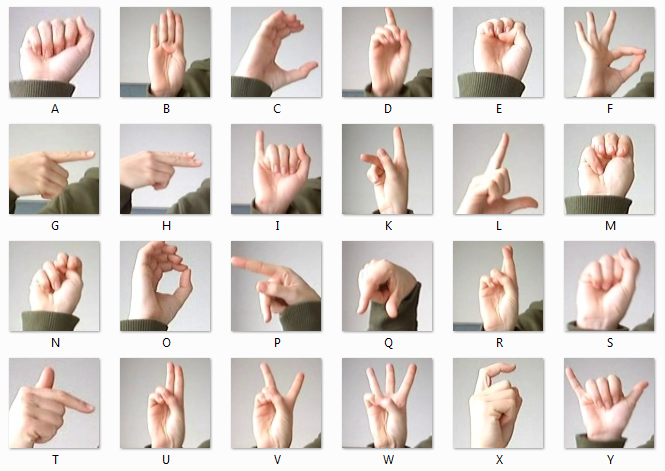

In [ ]:
from IPython.display import Image
Image('amer_sign2.png')

In [ ]:
train = pd.read_csv('sign_mnist_train.csv')
test = pd.read_csv('sign_mnist_test.csv')

In [ ]:
train_set = np.array(train, dtype = 'float32')
test_set = np.array(test, dtype='float32')

In [ ]:
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

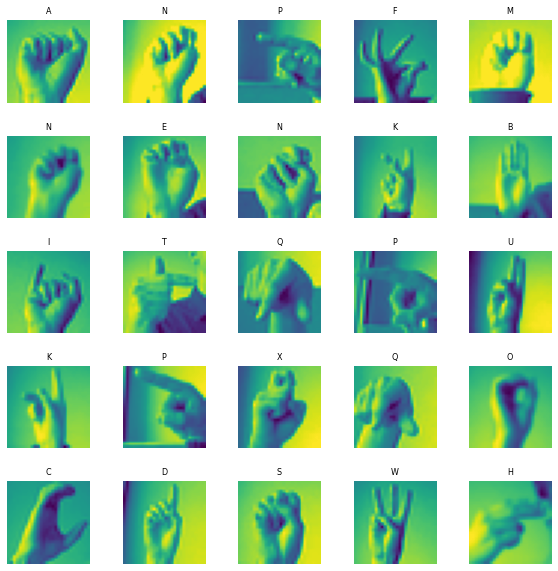

In [ ]:
def display_n_by_n_data_images(n):
# Define the dimensions of the plot grid 
  W_grid = n
  L_grid = n
  fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))
  axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array
  n_train = len(train_set) # get the length of the train dataset
  # Select a random number from 0 to n_train
  for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 
      # Select a random number
      index = np.random.randint(0, n_train)
      # read and display an image with the selected index    
      axes[i].imshow( train_set[index,1:].reshape((28,28)) )
      label_index = int(train_set[index,0])
      axes[i].set_title(class_names[label_index], fontsize = 8)
      axes[i].axis('off')
  plt.subplots_adjust(hspace=0.4)


display_n_by_n_data_images(5)

In [ ]:
def normalise_data():
  # Prepare the training and testing dataset 
  X_train = train_set[:, 1:] / 255
  y_train = train_set[:, 0]

  X_test = test_set[:, 1:] / 255
  y_test = test_set[:,0]
  return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = normalise_data()

In [ ]:
#Split the training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

#CONVOLUTIONAL NEURAL NETWORKS

In [ ]:
# Unpack the training and test tuple
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

print(X_train.shape)
print(y_train.shape)
print(X_validate.shape)

(21964, 28, 28, 1)
(21964,)
(5491, 28, 28, 1)


In [ ]:
#Defining the Convolutional Neural Network
cnn_model = Sequential()

cnn_model.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(128, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 512, activation = 'relu'))
cnn_model.add(Dropout(0.25))
cnn_model.add(Dense(units = 25, activation = 'softmax'))


In [ ]:
#CNN Model Summary
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [ ]:
#Compiling
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam' ,metrics =['accuracy'])
# What is this new loss function?

#Training the CNN model
history = cnn_model.fit(X_train, y_train, batch_size = 512, epochs = 25, verbose = 1, validation_data = (X_validate, y_validate))

Epoch 1/25
43/43 [==============================] - 12s 25ms/step - loss: 3.1720 - accuracy: 0.0576 - val_loss: 3.0710 - val_accuracy: 0.1384
Epoch 2/25
43/43 [==============================] - 1s 14ms/step - loss: 2.7441 - accuracy: 0.1527 - val_loss: 2.2710 - val_accuracy: 0.3078
Epoch 3/25
43/43 [==============================] - 1s 14ms/step - loss: 2.0875 - accuracy: 0.3161 - val_loss: 1.6218 - val_accuracy: 0.5207
Epoch 4/25
43/43 [==============================] - 1s 15ms/step - loss: 1.5983 - accuracy: 0.4665 - val_loss: 1.1245 - val_accuracy: 0.6511
Epoch 5/25
43/43 [==============================] - 1s 14ms/step - loss: 1.2158 - accuracy: 0.5853 - val_loss: 0.8248 - val_accuracy: 0.7510
Epoch 6/25
43/43 [==============================] - 1s 14ms/step - loss: 0.9881 - accuracy: 0.6573 - val_loss: 0.6263 - val_accuracy: 0.8013
Epoch 7/25
43/43 [==============================] - 1s 14ms/step - loss: 0.8205 - accuracy: 0.7179 - val_loss: 0.4867 - val_accuracy: 0.8432
Epoch 8/25
4

Text(0.5, 1.0, 'Accuracy evolution')

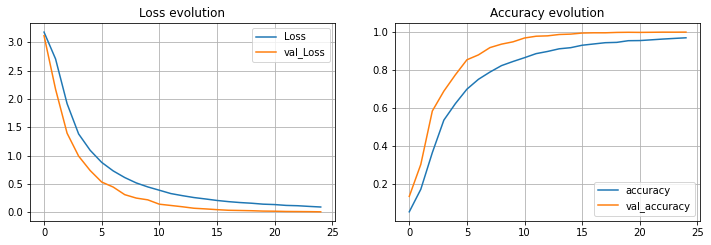

In [ ]:
#Visualizing the training performance
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.grid()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy evolution')

In [ ]:
#Predictions for the test data
predicted_classes = cnn_model.predict(X_test)
predicted_classes=np.argmax(predicted_classes,axis=1)
predicted_classes

array([ 6,  5, 10, ...,  2,  4,  2])

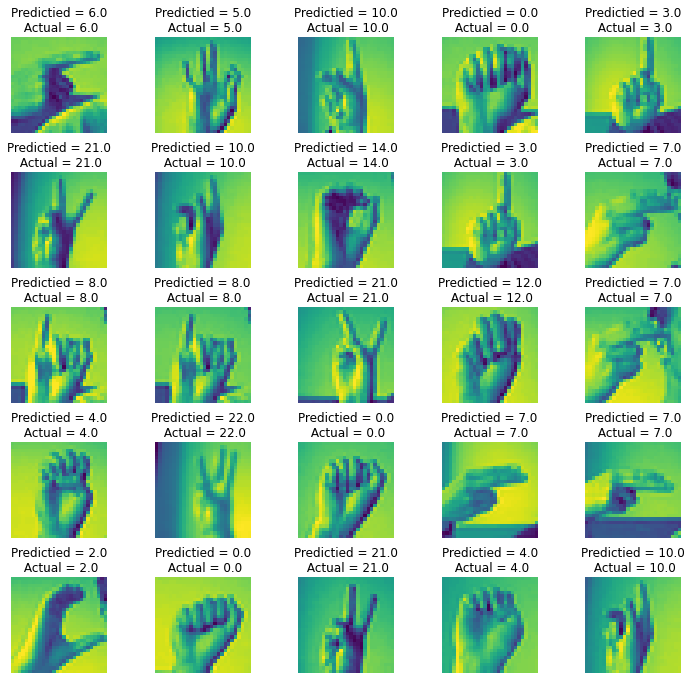

In [ ]:
#Visualize predictions
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title(f"Predictied = {predicted_classes[i]:0.1f}\n Actual = {y_test[i]:0.1f}")
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

In [ ]:
#Classification accuracy
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test, predicted_classes)
print('Accuracy Score = ',acc_score)

Accuracy Score =  0.9262409369771333
